## Data Understanding

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Reading dataset
df = pd.read_csv('depression_anxiety_data.csv')

# Shape of dataframe (rows, columns)
df.shape

(783, 19)

In [3]:
# dataframe head -- first-five rows
df.head()

id  school_year  age  gender        bmi          who_bmi  phq_score  \
0   1            1   19    male  33.333333  Class I Obesity          9   
1   2            1   18    male  19.841270           Normal          8   
2   3            1   19    male  25.102391       Overweight          8   
3   4            1   18  female  23.738662           Normal         19   
4   5            1   18    male  25.617284       Overweight          6   

  depression_severity depressiveness suicidal depression_diagnosis  \
0                Mild          False    False                False   
1                Mild          False    False                False   
2                Mild          False    False                False   
3   Moderately severe           True     True                False   
4                Mild          False    False                False   

  depression_treatment  gad_score anxiety_severity anxiousness  \
0                False         11         Moderate        True   
1                False          5             Mild       False   
2                False          6             Mild       False   
3                False         15           Severe        True   
4                False         14         Moderate        True   

  anxiety_diagnosis anxiety_treatment  epworth_score sleepiness  
0             False             False            7.0      False  
1             False             False           14.0       True  
2             False             False            6.0      False  
3             False             False           11.0       True  
4             False             False            3.0      False

In [4]:
# dataframe tail - last-five rows
df.tail()

id  school_year  age  gender        bmi     who_bmi  phq_score  \
778  779            4   24  female  21.096191      Normal          6   
779  780            4   22    male  25.308642  Overweight          4   
780  781            4   22    male  22.720438      Normal          2   
781  782            4   22  female  23.033168      Normal         17   
782  783            4   22    male  22.598140      Normal          6   

    depression_severity depressiveness suicidal depression_diagnosis  \
778                Mild          False    False                False   
779        None-minimal          False    False                False   
780        None-minimal          False    False                False   
781   Moderately severe           True    False                False   
782                Mild          False    False                False   

    depression_treatment  gad_score anxiety_severity anxiousness  \
778                False          1     None-minimal       False   
779                False          6             Mild       False   
780                False          5             Mild       False   
781                False         19           Severe        True   
782                False          6             Mild       False   

    anxiety_diagnosis anxiety_treatment  epworth_score sleepiness  
778             False             False            3.0      False  
779             False             False            3.0      False  
780             False             False            4.0      False  
781             False             False           15.0       True  
782             False             False            0.0      False

In [5]:
# dataframe info -- overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [6]:
# dataframe description
df.describe()

id  school_year         age         bmi   phq_score  \
count  783.000000   783.000000  783.000000  783.000000  783.000000   
mean   392.000000     2.277139   20.233716   23.420533    7.123883   
std    226.176922     1.163633    1.767217    4.563630    4.426580   
min      1.000000     1.000000   18.000000    0.000000    0.000000   
25%    196.500000     1.000000   19.000000   20.989420    4.000000   
50%    392.000000     2.000000   20.000000   23.140496    6.000000   
75%    587.500000     3.000000   21.000000   25.519924    9.000000   
max    783.000000     4.000000   31.000000   54.552668   24.000000   

        gad_score  epworth_score  
count  783.000000     775.000000  
mean     6.810983       6.376774  
std      4.727352       3.996443  
min      0.000000       0.000000  
25%      3.000000       3.500000  
50%      6.000000       6.000000  
75%      9.000000       9.000000  
max     21.000000      32.000000

## Data Preparation

In [7]:
# Drop unecessary columns  --- that do not provide relevant information for anxiety
df.drop(["id", "depression_severity", "depressiveness", "depression_diagnosis", "depression_treatment"], axis = 1, inplace = True)

In [8]:
# Check for missing values
df.isnull().sum()

school_year          0
age                  0
gender               0
bmi                  0
who_bmi              0
phq_score            0
suicidal             1
gad_score            0
anxiety_severity     0
anxiousness          6
anxiety_diagnosis    4
anxiety_treatment    2
epworth_score        8
sleepiness           8
dtype: int64

### Repalcing missing values

In [9]:
df["suicidal"].fillna("False", inplace = True)
df["anxiousness"].fillna("False", inplace = True)
df["anxiety_diagnosis"].fillna("False", inplace = True)
df["anxiety_treatment"].fillna("False", inplace = True)
df["epworth_score"].fillna("4.0", inplace = True)
df["sleepiness"].fillna("False", inplace = True)

In [10]:
# Check for missing values
df.isnull().sum()

school_year          0
age                  0
gender               0
bmi                  0
who_bmi              0
phq_score            0
suicidal             0
gad_score            0
anxiety_severity     0
anxiousness          0
anxiety_diagnosis    0
anxiety_treatment    0
epworth_score        0
sleepiness           0
dtype: int64

### Check for data entered wrongly

When replacing missing values it resulted in having multiple categories of the same value.
Look at "suicidal" for instance

<Axes: >

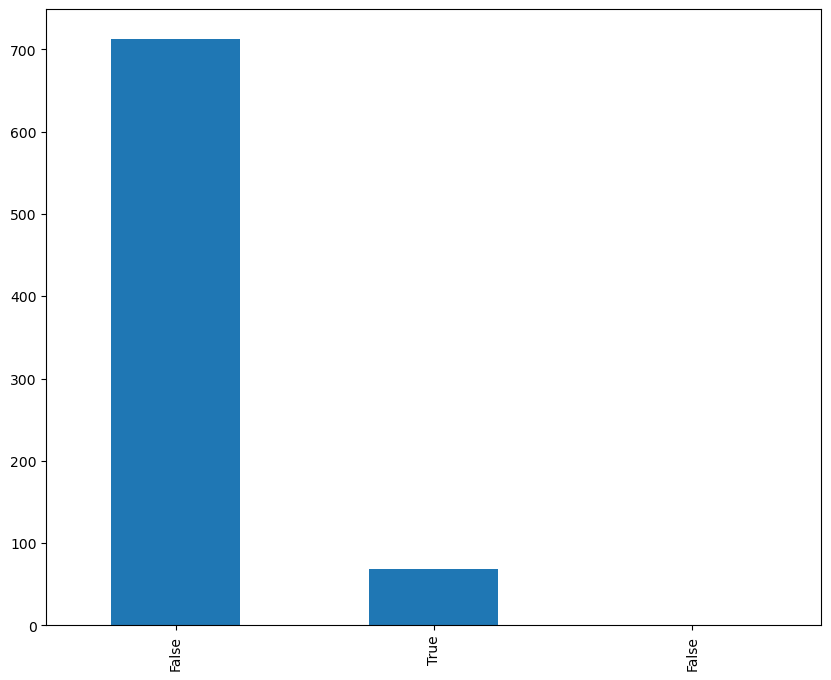

In [11]:
df["suicidal"].value_counts().plot(kind = "bar", figsize = (10,8))

Fix problem caused by replacing missing values

In [12]:
df["suicidal"].replace(["False"], False, inplace = True)
df["anxiousness"].replace(["False"], False, inplace = True)
df["anxiety_diagnosis"].replace(["False"], False, inplace = True)
df["anxiety_treatment"].replace(["False"], False, inplace = True)
df["epworth_score"].replace(["4.0"], 4.0, inplace = True)
df["sleepiness"].replace(["False"], False, inplace = True)
# Solves the 0 value problem under 'anxiety_severity'
df["anxiety_severity"].replace(["0"], "Mild", inplace = True)

<Axes: >

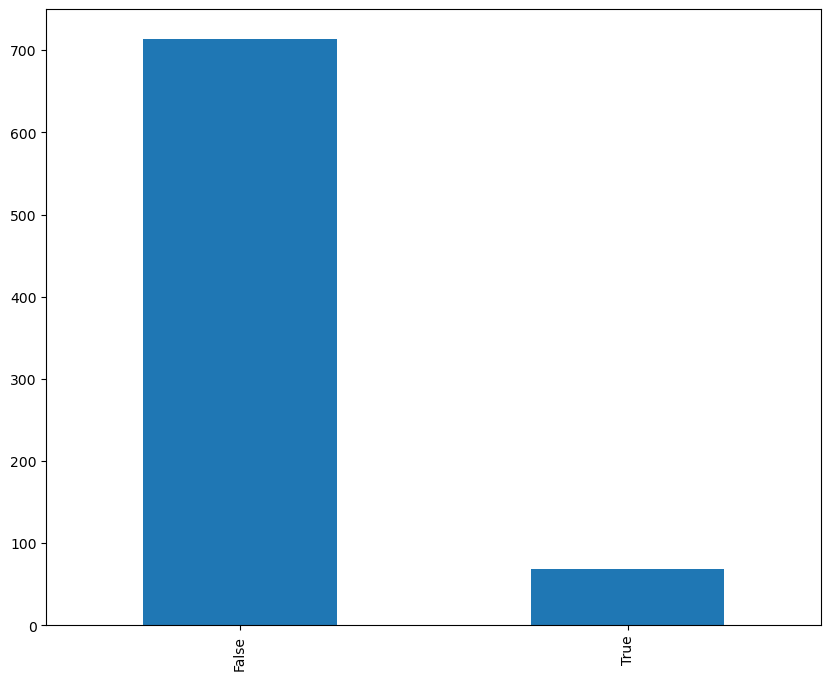

In [13]:
# Checking if problem is fixed
df["suicidal"].value_counts().plot(kind = "bar", figsize = (10,8))

Anxiety Severity 

Text(0, 0.5, 'Count')

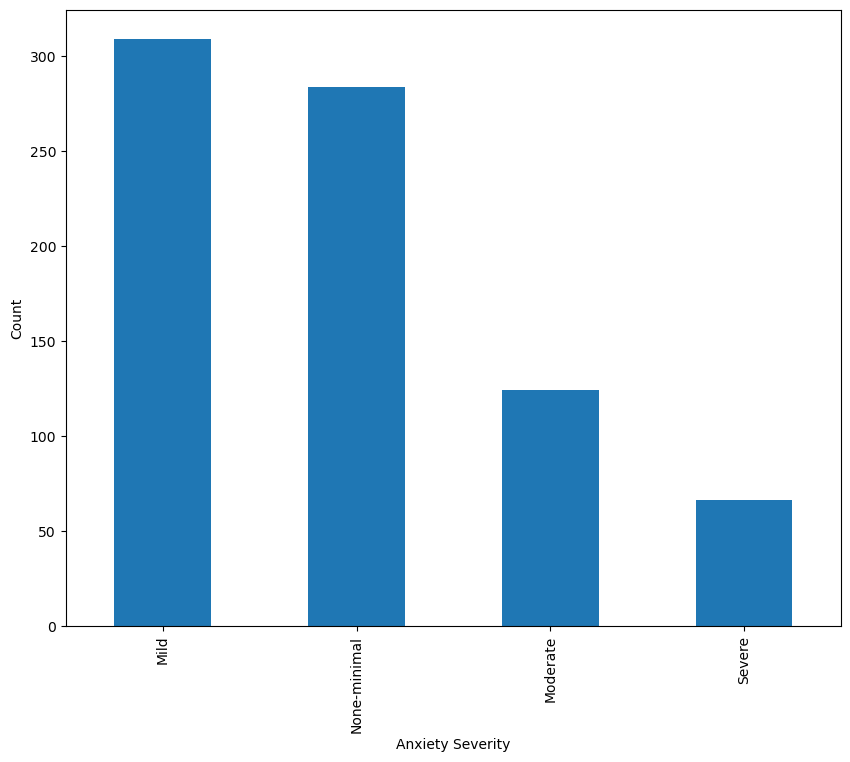

In [14]:
# Visualizing target
df["anxiety_severity"].value_counts().plot(kind = "bar", figsize = (10,8))
plt.xlabel('Anxiety Severity')
plt.ylabel('Count')

### Converting categorical values into numerical values

In [15]:
# Creating Features and label/target
X = df.drop(["anxiety_severity", "anxiousness", "anxiety_diagnosis", "anxiety_treatment"], axis = 1)           # features
y = df["anxiety_severity"]                                                                      # label

X.shape, y.shape

((783, 10), (783,))

In [16]:
# Importing packages to enable us convert categorical values in 'features' into numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

ct = ColumnTransformer([("oe", OrdinalEncoder(),["gender", "who_bmi", "suicidal", "sleepiness"])], remainder = "passthrough")
X = ct.fit_transform(X)

### Visualizing Features

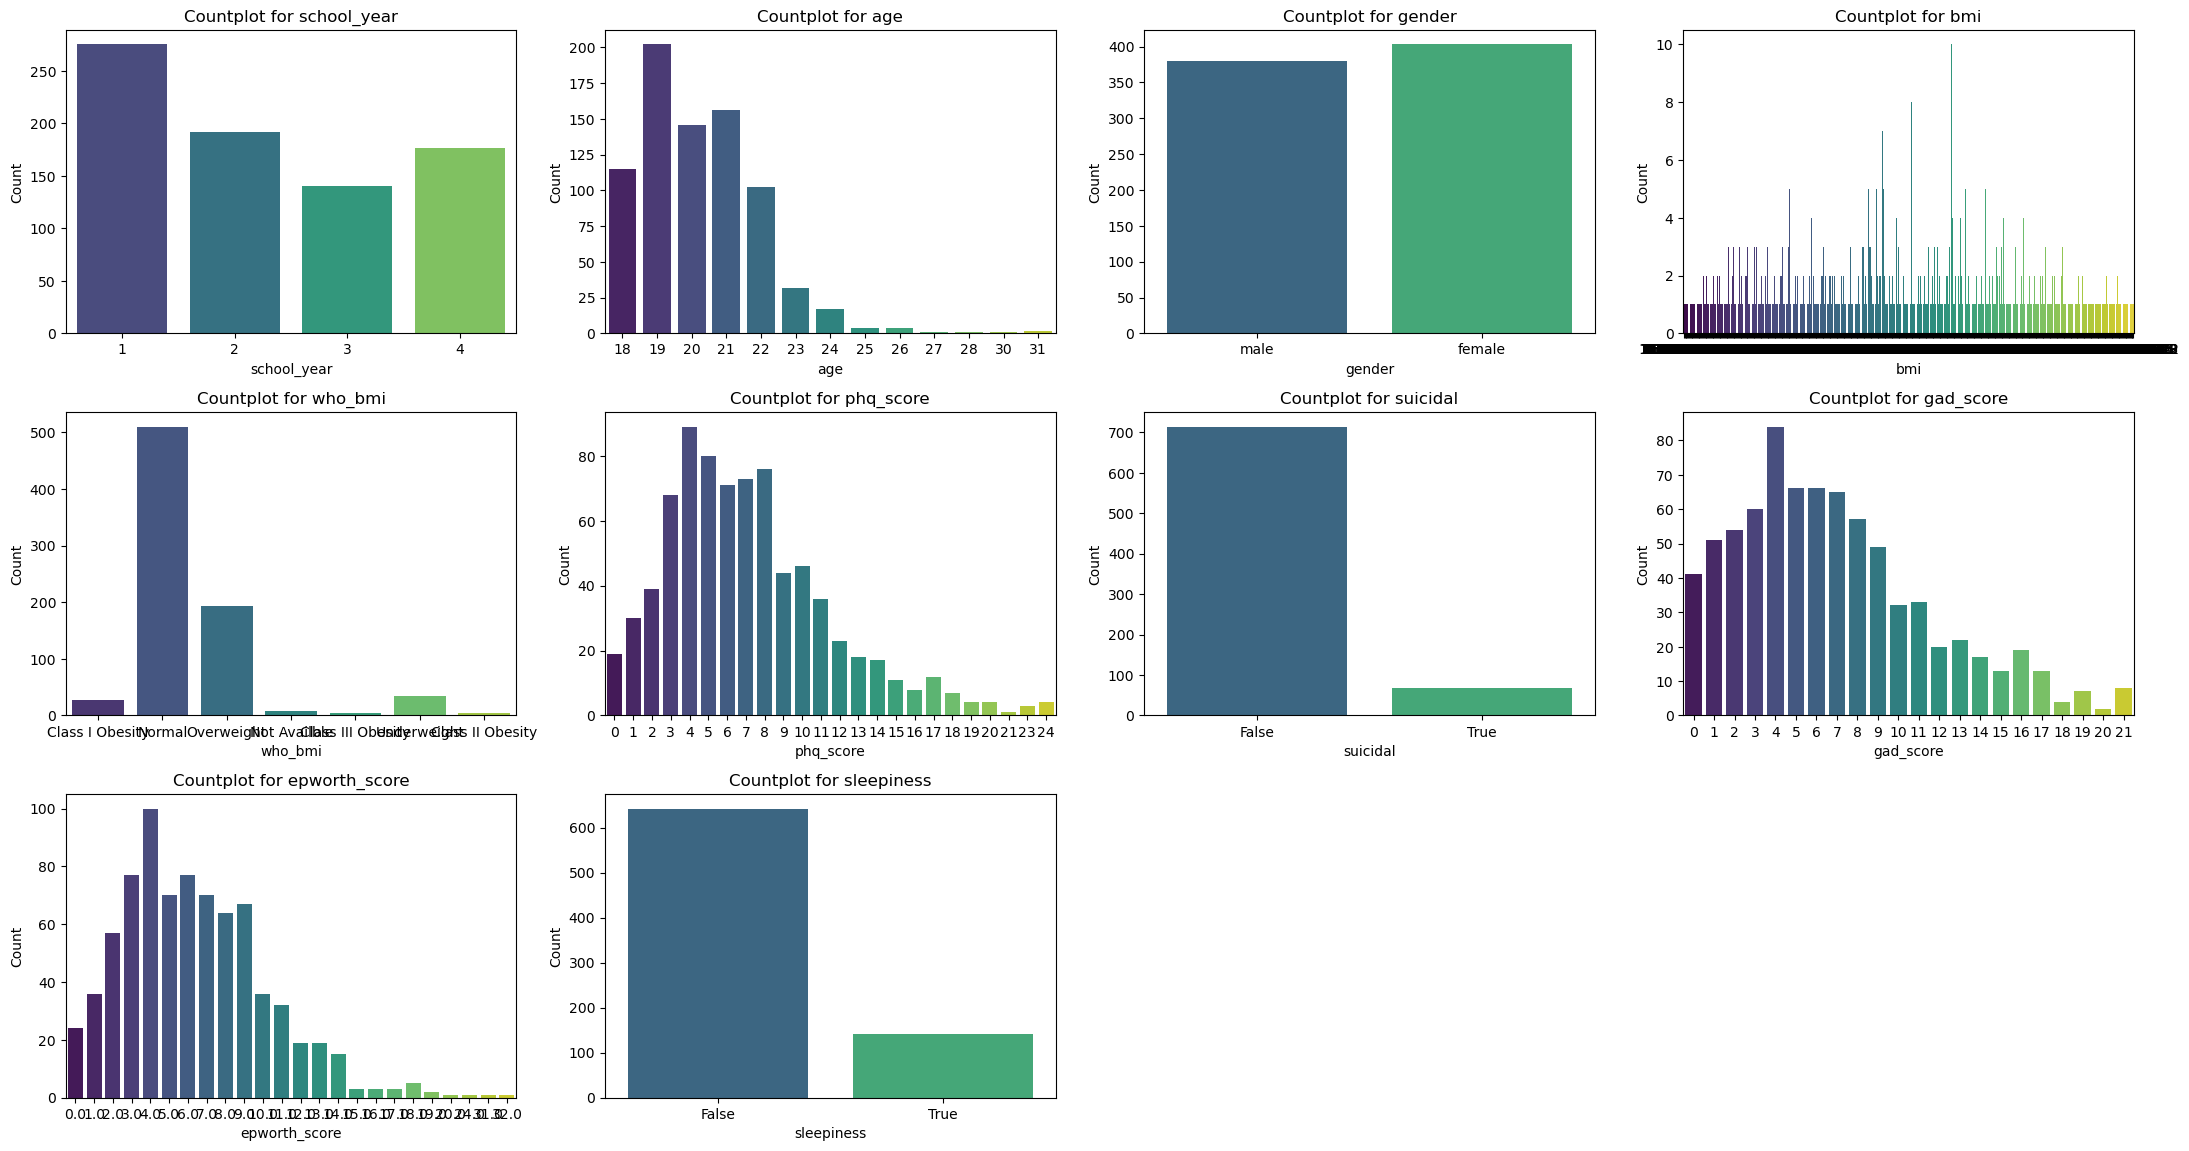

In [17]:
# Features
features = ['school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score', 'suicidal', 
            'gad_score', 'epworth_score', 'sleepiness']

# Set up the plot
plt.figure(figsize=(22, 15))

# Plot countplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Countplot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

### Splitting dataset into train and test

In [18]:
from sklearn.model_selection import train_test_split

# 70% train & 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)
# Checking the size for the train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((548, 10), (235, 10), (548,), (235,))

## Modelling

### Random Forest Classification

In [19]:
from sklearn.ensemble import  RandomForestClassifier
rf = RandomForestClassifier(criterion = "gini", max_depth = 4, min_samples_split = 5, random_state = 5)

Train the model

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=5, random_state=5)

Make predictions

In [21]:
y_pred = rf.predict(X_test)

### Evaluating Performance

- Confusion matrix

Text(50.722222222222214, 0.5, 'True Labels')

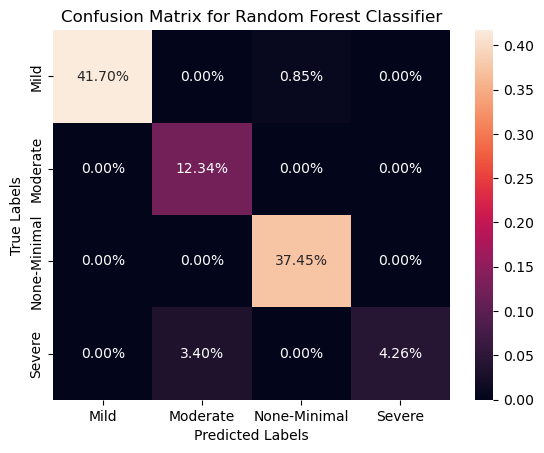

In [22]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = ".2%")
ax.xaxis.set_ticklabels(["Mild", "Moderate", "None-Minimal", "Severe"])
ax.yaxis.set_ticklabels(["Mild", "Moderate", "None-Minimal", "Severe"])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

- Classification report

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Mild       0.98      1.00      0.99        98
    Moderate       1.00      0.78      0.88        37
None-minimal       1.00      0.98      0.99        90
      Severe       0.56      1.00      0.71        10

    accuracy                           0.96       235
   macro avg       0.88      0.94      0.89       235
weighted avg       0.97      0.96      0.96       235



In [25]:
# This block of code evaluates the model using Accuracy, Precision, Recall, and F1-score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9574
Precision: 0.9650
Recall: 0.9574
F1-Score: 0.9547


### AdaBoost Classifier

In [26]:
# Creating model
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state = 5)

Train the model

In [27]:
ab.fit(X_train, y_train)

AdaBoostClassifier(random_state=5)

Make prediction

In [28]:
ab_pred = ab.predict(X_test)

### Evaluating Performance

In [29]:
# This block of code evaluates the model using Accuracy, Precision, Recall, and F1-score

accuracy = accuracy_score(y_test, ab_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, ab_pred, average='weighted', zero_division=1)    # zero_division handles error
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, ab_pred, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, ab_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.6255
Precision: 0.8008
Recall: 0.6255
F1-Score: 0.4955


#### Hyper-parameter tunning of AdaBoost model
This is to improve the model performance

In [30]:
# Using RandomizedSearchCV for the hyper-parameter tunning (to suggest best params value)
from sklearn.model_selection import RandomizedSearchCV

# This generates n_estimators(15) and learning_rate(8)
params_ab = {"n_estimators": [int(x) for x in np.linspace(start = 1, stop = 50, num = 15)], 
            "learning_rate": [(0.97 + x / 100) for x in range(0, 8)],
            }

# Tunned model
ab_random = RandomizedSearchCV(random_state = 5, estimator = ab, param_distributions = params_ab, n_iter = 50, cv = 5, n_jobs = -1)

In [31]:
# Values of n_estimators and learning_rate
params_ab

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [32]:
# Training tunned model
ab_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=5),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=5)

In [33]:
# Suggest best parameter value
ab_random.best_params_

{'n_estimators': 29, 'learning_rate': 0.98}

Using suggested params value to improve AdaBoost model

In [34]:
# Create Adaboost tunned model
ab_tunned = AdaBoostClassifier(random_state = 5, n_estimators = 29, learning_rate = 0.98) 

In [35]:
# Training tunned model
ab_tunned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.98, n_estimators=29, random_state=5)

Make predictions

In [36]:
ab_tunned_pred = ab_tunned.predict(X_test)

### Evaluating Performance

- Confusion matrix

Text(50.722222222222214, 0.5, 'True Labels')

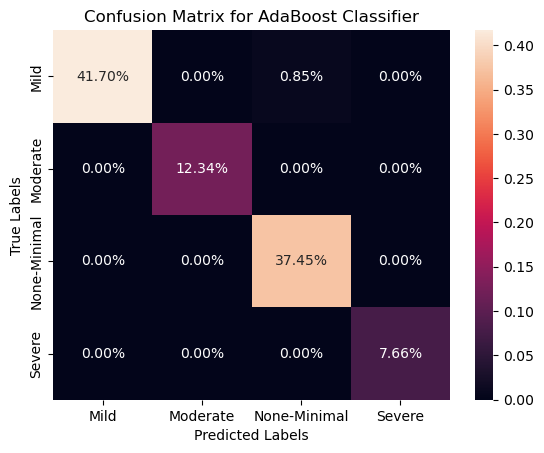

In [37]:
cf_matrix = confusion_matrix(y_test, ab_tunned_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = ".2%")
ax.xaxis.set_ticklabels(["Mild", "Moderate", "None-Minimal", "Severe"])
ax.yaxis.set_ticklabels(["Mild", "Moderate", "None-Minimal", "Severe"])
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

- Classification report

In [39]:
print(classification_report(ab_tunned_pred, y_test))

              precision    recall  f1-score   support

        Mild       0.98      1.00      0.99        98
    Moderate       1.00      1.00      1.00        29
None-minimal       1.00      0.98      0.99        90
      Severe       1.00      1.00      1.00        18

    accuracy                           0.99       235
   macro avg       0.99      0.99      0.99       235
weighted avg       0.99      0.99      0.99       235



In [40]:
# This block of code evaluates the model using Accuracy, Precision, Recall, F1-score, and cross validation

accuracy = accuracy_score(y_test, ab_tunned_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, ab_tunned_pred, average='weighted', zero_division=1)    # zero_division handles error
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, ab_tunned_pred, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, ab_tunned_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9915
Precision: 0.9917
Recall: 0.9915
F1-Score: 0.9915
